In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Sentiment score 데이터 불러오기
df = pd.read_csv("oilprice_sen_mean.csv") #유가
w_df = pd.read_csv("war_sen_mean.csv") #전쟁
i_df = pd.read_csv("inf_sen_mean.csv") #인플레
e_df = pd.read_csv("ex_sen_mean.csv") #환율

In [ ]:
# Sentiment score 데이터프레임 합치기
e_df = e_df[['Label1_Total', 'Label2_Total']]
i_df = i_df[['Label1_Total', 'Label2_Total']]
w_df = w_df[['Label1_Total', 'Label2_Total']]
df = pd.concat([df, w_df, i_df, e_df],axis=1)
df.head()

,Date,Label1_Total,Label2_Total,Label1_Total,Label2_Total,Label1_Total,Label2_Total,Label1_Total,Label2_Total
0,2022-05-01,0.499627,1.951220,0.383831,2.833333,0.499717,2.571429,0.257554,1.736842
1,2022-05-02,0.481654,1.461538,0.525667,2.107143,0.511931,2.508197,0.483117,2.333333
2,2022-05-03,0.499262,1.400000,0.466268,1.888889,0.494765,1.490323,0.494255,2.325581
3,2022-05-04,0.495387,2.200000,0.566792,2.115385,0.502894,1.833333,0.345417,1.459016
4,2022-05-05,0.380906,1.320000,0.494360,2.000000,0.499799,1.783784,0.415690,2.000000


In [ ]:
len(df)

31

In [ ]:
# 네이버 금융의 유가 가격
df2 = pd.read_csv("naver_oilprice.csv")
df2.columns = ['날짜', '유가', '전일대비', '등락율']
df2.head()

,날짜,유가,전일대비,등락율
0,2022.05.01,1954.03,20.74,-1.05%
1,2022.05.02,1943.50,11.30,-0.58%
2,2022.05.03,1937.28,7.35,-0.38%
3,2022.05.04,1933.86,4.13,-0.21%
4,2022.05.05,1931.94,2.53,-0.13%


In [ ]:
# 칼럼명 더 알아보기 쉽게 변경 
df.columns = ['날짜','유가_sentiment1', '유가_sentiment2', '전쟁_sentiment1', '전쟁_sentiment2', '인플레이션_sentiment1', '인플레이션_sentiment2', '환율_sentiment1', '환율_sentiment2']
df3 = pd.concat([df, df2['유가']], axis=1)
df3.head() 

,날짜,유가_sentiment1,유가_sentiment2,전쟁_sentiment1,전쟁_sentiment2,인플레이션_sentiment1,인플레이션_sentiment2,환율_sentiment1,환율_sentiment2,유가
0,2022-05-01,0.499627,1.951220,0.383831,2.833333,0.499717,2.571429,0.257554,1.736842,1954.03
1,2022-05-02,0.481654,1.461538,0.525667,2.107143,0.511931,2.508197,0.483117,2.333333,1943.50
2,2022-05-03,0.499262,1.400000,0.466268,1.888889,0.494765,1.490323,0.494255,2.325581,1937.28
3,2022-05-04,0.495387,2.200000,0.566792,2.115385,0.502894,1.833333,0.345417,1.459016,1933.86
4,2022-05-05,0.380906,1.320000,0.494360,2.000000,0.499799,1.783784,0.415690,2.000000,1931.94


In [ ]:
import numpy as np

#np.random.seed(0)

## 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split

x = df3[['유가_sentiment1', '유가_sentiment2', '전쟁_sentiment1', '전쟁_sentiment2', '인플레이션_sentiment1', '인플레이션_sentiment2', '환율_sentiment1', '환율_sentiment2']]
y = df3[['유가']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
y_predict = mlr.predict(x_test)

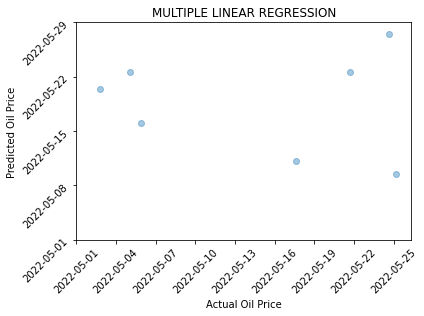

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Oil Price")
plt.ylabel("Predicted Oil Price")
plt.title("MULTIPLE LINEAR REGRESSION")

plt.xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], 
            ['2022-05-01', '2022-05-04', '2022-05-07', '2022-05-10', '2022-05-13',
             '2022-05-16', '2022-05-19', '2022-05-22', '2022-05-25', '2022-05-28'], rotation = 45)
plt.yticks([1940, 1950, 1960, 1970, 1980], ['2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29'], rotation = 45)
plt.show()

In [ ]:
print(mlr.coef_)

[[ 2.19174283e+02  5.55898974e-02 -1.50605017e+01 -7.07924864e+00
   2.02072723e+02  3.98764411e+00  1.10004746e+01  5.73029136e+00]]


## 각각의 변수와 유가 간의 관계 중 유의미한 결과들

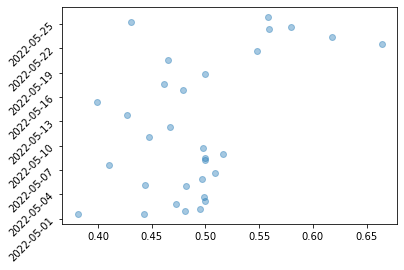

In [ ]:
#유가기사와 유가
plt.scatter(df3['유가_sentiment1'], df3['유가'], alpha=0.4)
plt.yticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], 
            ['2022-05-01', '2022-05-04', '2022-05-07', '2022-05-10', '2022-05-13',
             '2022-05-16', '2022-05-19', '2022-05-22', '2022-05-25', '2022-05-28'], rotation = 45)
plt.show()

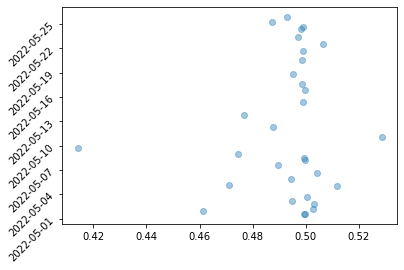

In [ ]:
#인플레이션기사와 유가
plt.scatter(df3['인플레이션_sentiment1'], df3['유가'], alpha=0.4)
plt.yticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], 
            ['2022-05-01', '2022-05-04', '2022-05-07', '2022-05-10', '2022-05-13',
             '2022-05-16', '2022-05-19', '2022-05-22', '2022-05-25', '2022-05-28'], rotation = 45)
plt.show()

In [ ]:
# 유가 예상
#((y - y_predict) ** 2).sum()
((y - y.mean()) ** 2).sum()

유가    23027.570071
dtype: float64

## 결정계수 

In [ ]:
# 유가
print(mlr.score(x_train, y_train))

0.20659635231599083


In [ ]:
# 유가+전쟁
print(mlr.score(x_train, y_train))

0.3756322179050079


In [ ]:
# 유가+전쟁+인플레
print(mlr.score(x_train, y_train))

0.4357107340503723


In [ ]:
# 유가+전쟁+인플레+환율
print(mlr.score(x_train, y_train))

0.5767373588381712


## Regression 추가 진행

### corrleation heatmap

In [ ]:
!pip install -U scipy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
#plt.rcParams["figure.figsize"] = (14,8)

In [ ]:
import seaborn as sns

In [ ]:
corr = df3.corr()

In [ ]:
corr

,유가_sentiment1,유가_sentiment2,전쟁_sentiment1,전쟁_sentiment2,인플레이션_sentiment1,인플레이션_sentiment2,환율_sentiment1,환율_sentiment2,유가
유가_sentiment1,1.000000,-0.118420,0.021835,0.135104,0.079349,-0.234065,0.156725,0.022276,0.482190
유가_sentiment2,-0.118420,1.000000,0.120995,0.056854,0.281569,-0.198963,0.071927,-0.024544,-0.028017
전쟁_sentiment1,0.021835,0.120995,1.000000,0.372269,0.465763,0.194075,0.289529,0.131662,-0.172274
전쟁_sentiment2,0.135104,0.056854,0.372269,1.000000,0.004265,0.353910,0.300998,0.427202,0.044030
인플레이션_sentiment1,0.079349,0.281569,0.465763,0.004265,1.000000,0.091130,-0.009155,-0.087234,0.095701
인플레이션_sentiment2,-0.234065,-0.198963,0.194075,0.353910,0.091130,1.000000,-0.169108,0.104916,-0.248874
환율_sentiment1,0.156725,0.071927,0.289529,0.300998,-0.009155,-0.169108,1.000000,0.205943,0.055659
환율_sentiment2,0.022276,-0.024544,0.131662,0.427202,-0.087234,0.104916,0.205943,1.000000,-0.071753
유가,0.482190,-0.028017,-0.172274,0.044030,0.095701,-0.248874,0.055659,-0.071753,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


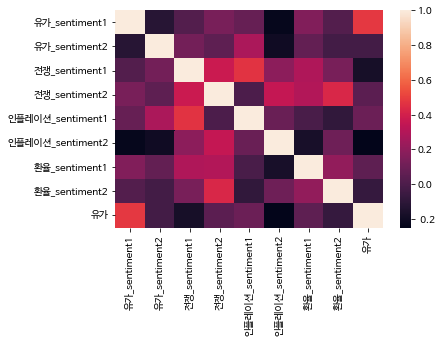

In [ ]:
sns.heatmap(corr)

In [ ]:
import numpy as np

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


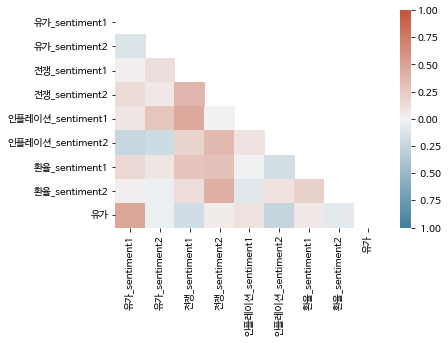

In [ ]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)

## OLS Regression

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Y=df3['유가']

In [ ]:
X = df3[['유가_sentiment1', '유가_sentiment2', '전쟁_sentiment1', '전쟁_sentiment2', '인플레이션_sentiment1', '인플레이션_sentiment2', '환율_sentiment1', '환율_sentiment2']]
X2 = df3[['유가_sentiment1', '전쟁_sentiment1', '인플레이션_sentiment1', '환율_sentiment1']]
X3 = df3[['유가_sentiment2', '전쟁_sentiment2', '인플레이션_sentiment2', '환율_sentiment2']]

###  Forecast 

In [ ]:
X= sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,유가_sentiment1,유가_sentiment2,전쟁_sentiment1,전쟁_sentiment2,인플레이션_sentiment1,인플레이션_sentiment2,환율_sentiment1,환율_sentiment2
0,1.0,0.499627,1.951220,0.383831,2.833333,0.499717,2.571429,0.257554,1.736842
1,1.0,0.481654,1.461538,0.525667,2.107143,0.511931,2.508197,0.483117,2.333333
2,1.0,0.499262,1.400000,0.466268,1.888889,0.494765,1.490323,0.494255,2.325581
3,1.0,0.495387,2.200000,0.566792,2.115385,0.502894,1.833333,0.345417,1.459016
4,1.0,0.380906,1.320000,0.494360,2.000000,0.499799,1.783784,0.415690,2.000000


In [ ]:
X2= sm.add_constant(X2)
X3= sm.add_constant(X3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 모델 둘 다 넣었을 때
results=sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     유가   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1.372
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.263
Time:                        06:45:27   Log-Likelihood:                -140.18
No. Observations:                  31   AIC:                             298.4
Df Residuals:                      22   BIC:                             311.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1765.1039    150.570     11.723      0.000    1452.840    2077.368
유가_sentiment1      175.1339     88.045      1.989      0.059      -7.460     357.727
유가_sentiment2       -2.7370      8.067     -0.339      0.738     -19.466      13.992
전쟁_sentiment1      -75.1348     52.823     -1.422      0.169    -184.683      34.413
전쟁_sentiment2       10.0333     10.872      0.923      0.366     -12.513      32.579
인플레이션_sentiment1   349.8639    314.094      1.114      0.277    -301.527    1001.255
인플레이션_sentiment2   -18.0562     20.092     -0.899      0.379     -59.725      23.613
환율_sentiment1        5.6690     74.353      0.076      0.940    -148.529     159.867
환율_sentiment2       -3.5455      7.277     -0.487      0.631     -18.636      11.545
==============================================================================
Omnibus:                        1.880   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.313
Skew:                           0.259   Prob(JB):                        0.519
Kurtosis:                       2.135   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# snunlp 모델만 넣었을 때
results=sm.OLS(Y,X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     유가   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     2.736
Date:                Sun, 12 Jun 2022   Prob (F-statistic):             0.0504
Time:                        06:45:44   Log-Likelihood:                -141.00
No. Observations:                  31   AIC:                             292.0
Df Residuals:                      26   BIC:                             299.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1744.1445    133.807     13.035      0.000    1469.101    2019.188
유가_sentiment1      209.5842     76.039      2.756      0.011      53.285     365.884
전쟁_sentiment1      -68.9113     46.271     -1.489      0.148    -164.023      26.200
인플레이션_sentiment1   284.2691    274.133      1.037      0.309    -279.220     847.758
환율_sentiment1       26.1629     65.930      0.397      0.695    -109.357     161.683
==============================================================================
Omnibus:                        2.283   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.365
Skew:                           0.211   Prob(JB):                        0.505
Kurtosis:                       2.063   Cond. No.                         93.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#multilingual 모델만 넣었을 떼
results=sm.OLS(Y,X3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     유가   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.8125
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.529
Time:                        04:30:23   Log-Likelihood:                -144.62
No. Observations:                  31   AIC:                             299.2
Df Residuals:                      26   BIC:                             306.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2026.0125     42.290     47.908      0.000    1939.085    2112.940
유가_sentiment2       -5.2184      7.927     -0.658      0.516     -21.512      11.075
전쟁_sentiment2       11.4442     10.468      1.093      0.284     -10.072      32.961
인플레이션_sentiment2   -31.2267     18.719     -1.668      0.107     -69.703       7.250
환율_sentiment2      -20.0374     26.677     -0.751      0.459     -74.873      34.798
==============================================================================
Omnibus:                        5.008   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                1.847
Skew:                           0.145   Prob(JB):                        0.397
Kurtosis:                       1.840   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Compare predicted with realized

In [ ]:
import matplotlib.pyplot as plt

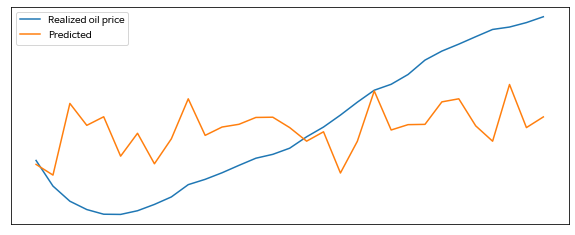

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
plt.plot(Y, label='Realized oil price')
plt.plot(Y.index,results.predict() , label='Predicted')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend()
plt.show()

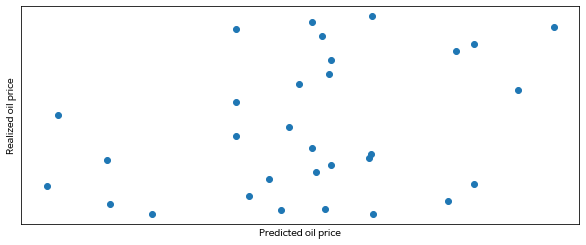

In [ ]:
plt.scatter(results.predict(),Y)
plt.xlabel('Predicted oil price')
plt.ylabel('Realized oil price')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

## (2022.06.13. 추가)
## Time series sentiment graph for each topic

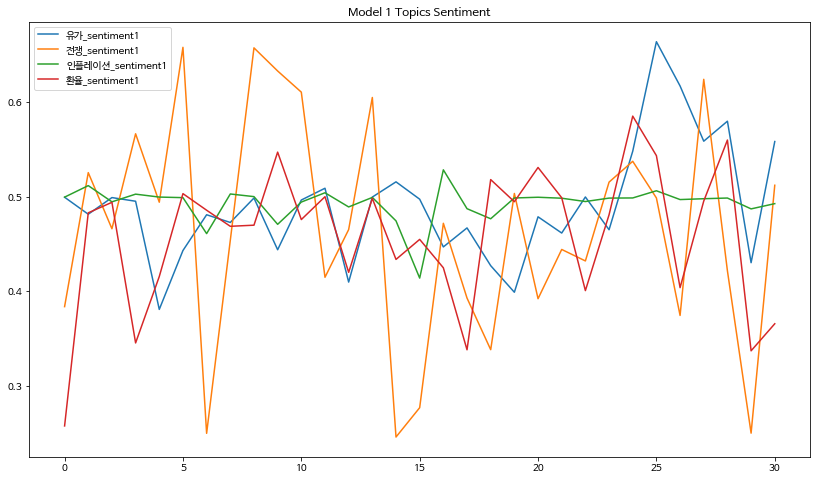

In [ ]:
# Model1의 Times series sentiment 출력
# Model1은 snunlp 모델 (0~1의 range를 가짐)

plt.rcParams["figure.figsize"] = (14,8)
df3[['유가_sentiment1', '전쟁_sentiment1', '인플레이션_sentiment1', '환율_sentiment1']].plot(title = 'Model 1 Topics Sentiment')

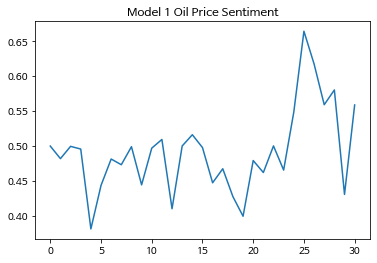

In [ ]:
#Model1+각각의 토픽의 Time series sentiment
plt.rcParams["figure.figsize"] = (6,4)
df3['유가_sentiment1'].plot(title = 'Model 1 Oil Price Sentiment')

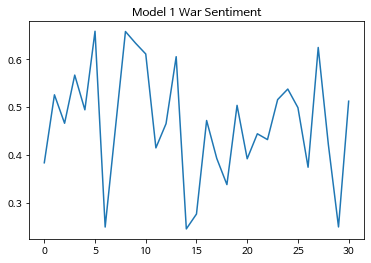

In [ ]:
df3['전쟁_sentiment1'].plot(title = 'Model 1 War Sentiment')

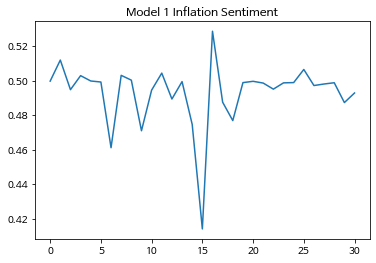

In [ ]:
df3['인플레이션_sentiment1'].plot(title = 'Model 1 Inflation Sentiment')

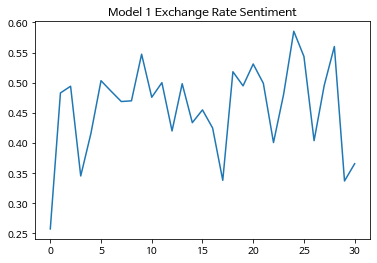

In [ ]:
df3['환율_sentiment1'].plot(title = 'Model 1 Exchange Rate Sentiment')

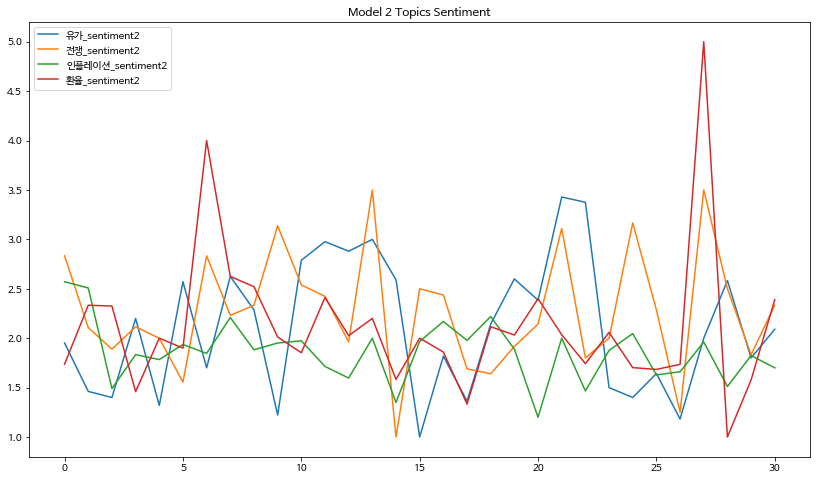

In [ ]:
# Model1의 Times series sentiment 출력
# Model1은 multilingual 모델 (1~5의 range를 가짐)

plt.rcParams["figure.figsize"] = (14,8)
df3[['유가_sentiment2', '전쟁_sentiment2', '인플레이션_sentiment2', '환율_sentiment2']].plot(title = 'Model 2 Topics Sentiment')

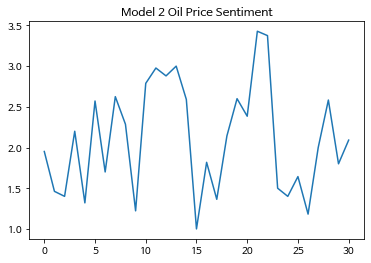

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
df3['유가_sentiment2'].plot(title = 'Model 2 Oil Price Sentiment')

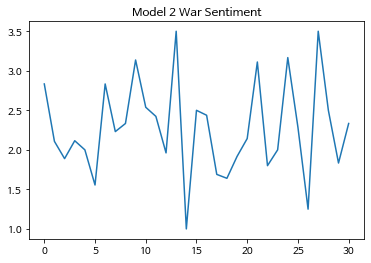

In [ ]:
df3['전쟁_sentiment2'].plot(title = 'Model 2 War Sentiment')

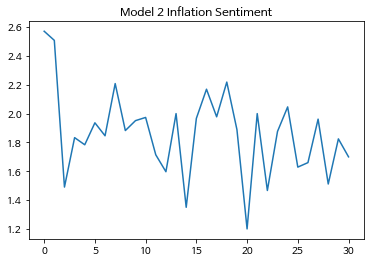

In [ ]:
df3['인플레이션_sentiment2'].plot(title = 'Model 2 Inflation Sentiment')

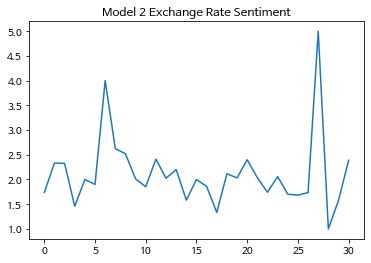

In [ ]:
df3['환율_sentiment2'].plot(title = 'Model 2 Exchange Rate Sentiment')